---
title: "Dimensionality Reduction"
format:
    html:
        page-layout: full
        code-fold: show
        code-copy: true
        code-tools: true
        code-overflow: wrap
---

One goal of my project is to investigate and showcase how Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) can efficiently reduce the dimensionality of multimodal data. The aim is to maintain crucial information within the data while improving visualization capabilities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import os
os.chdir('/Users/samanthamoon/Desktop/DSAN 5000/dsan-5000-project-samjmoon/dsan-website/5000-website/data-cleaning')
movie_df = pd.read_csv('popularity_data_analysis.csv')

## Dimensionality Reduction with PCA ##

I first conducted dimensionality reduction with the PCA (Principal Component Analysis) method. PCA is a dimensionality reduction technique that is often utilized in data analytics and machine learning. The goal of PCA is to retain as much of the original variance in the dataset while reducing high-dimensional data into lower-dimensional data, which allows us to uncover patterns in our data and reduce noise. In this project, I will apply the PCA method to my movies dataset. I will include a target variable “popularity” in my visualizations. Standardization is an important step in the process of PCA, to ensure that all features contribute equally to the end result. Another important factor is the explained variance ratio. Each principal component captures a level of variance in the dataset. The cumulative variance is then computed to deternmine how much information from the original dataset is retained when adding up the components.

In [2]:
pca_df = movie_df.drop('popularity', axis=1)
pca_df.head()

,avg_rating,budget,revenue,runtime,vote_average,vote_count
0,3.920930,30000000,373554033.0,81.0,7.7,5415.0
1,3.431818,65000000,262797249.0,104.0,6.9,2413.0
2,3.259615,0,0.0,101.0,6.5,92.0
3,2.357143,16000000,81452156.0,127.0,6.1,34.0
4,3.071429,0,76578911.0,106.0,5.7,173.0


Explained variance ratios: [0.41783783 0.26148186 0.15277634 0.08358834 0.05421176 0.03010387]
Optimal Number of Components: 5


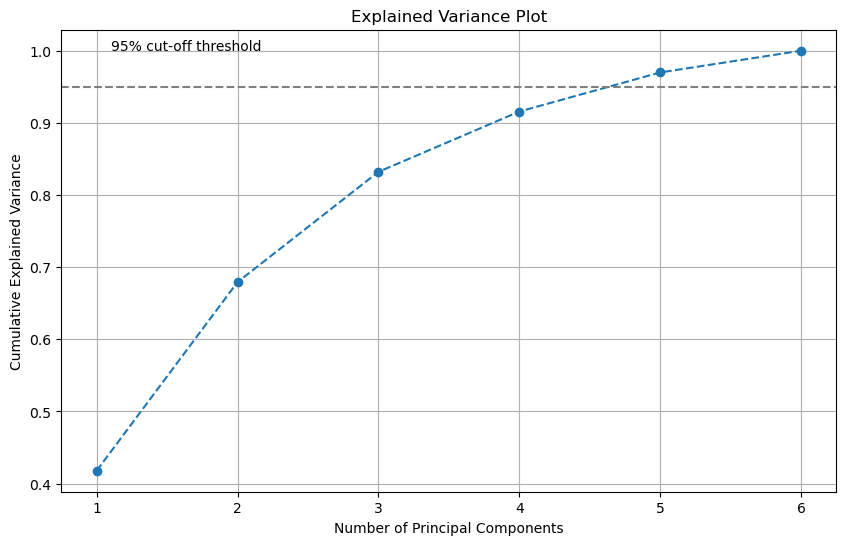

In [3]:
import seaborn as sns
scaler = StandardScaler()
pca_df_std = scaler.fit_transform(pca_df)

#applying PCA
pca = PCA()
pca_results = pca.fit_transform(pca_df_std)

#determining threshold cutoff for optimal number of components
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance ratios: {explained_variance_ratio}')
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Optimal Number of Components: {optimal_num_components}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=10)
plt.title('Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

<br>
I have applied PCA and plotted the cumulative explained variance against the length of the explained variance ratios (5) as it was determined that the optimal number of principal components for this model is 5. I’ve plotted a 95% cut-off line to confirm/indicate that in order to retain 95% of the orignal information, 5 principal components is optimal.
<br>
<br>

/var/folders/mm/79b3ggcn52x9kcrnqfx5mtk40000gn/T/ipykernel_61244/1261670613.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_pcs['target'] = movie_df['popularity']
/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


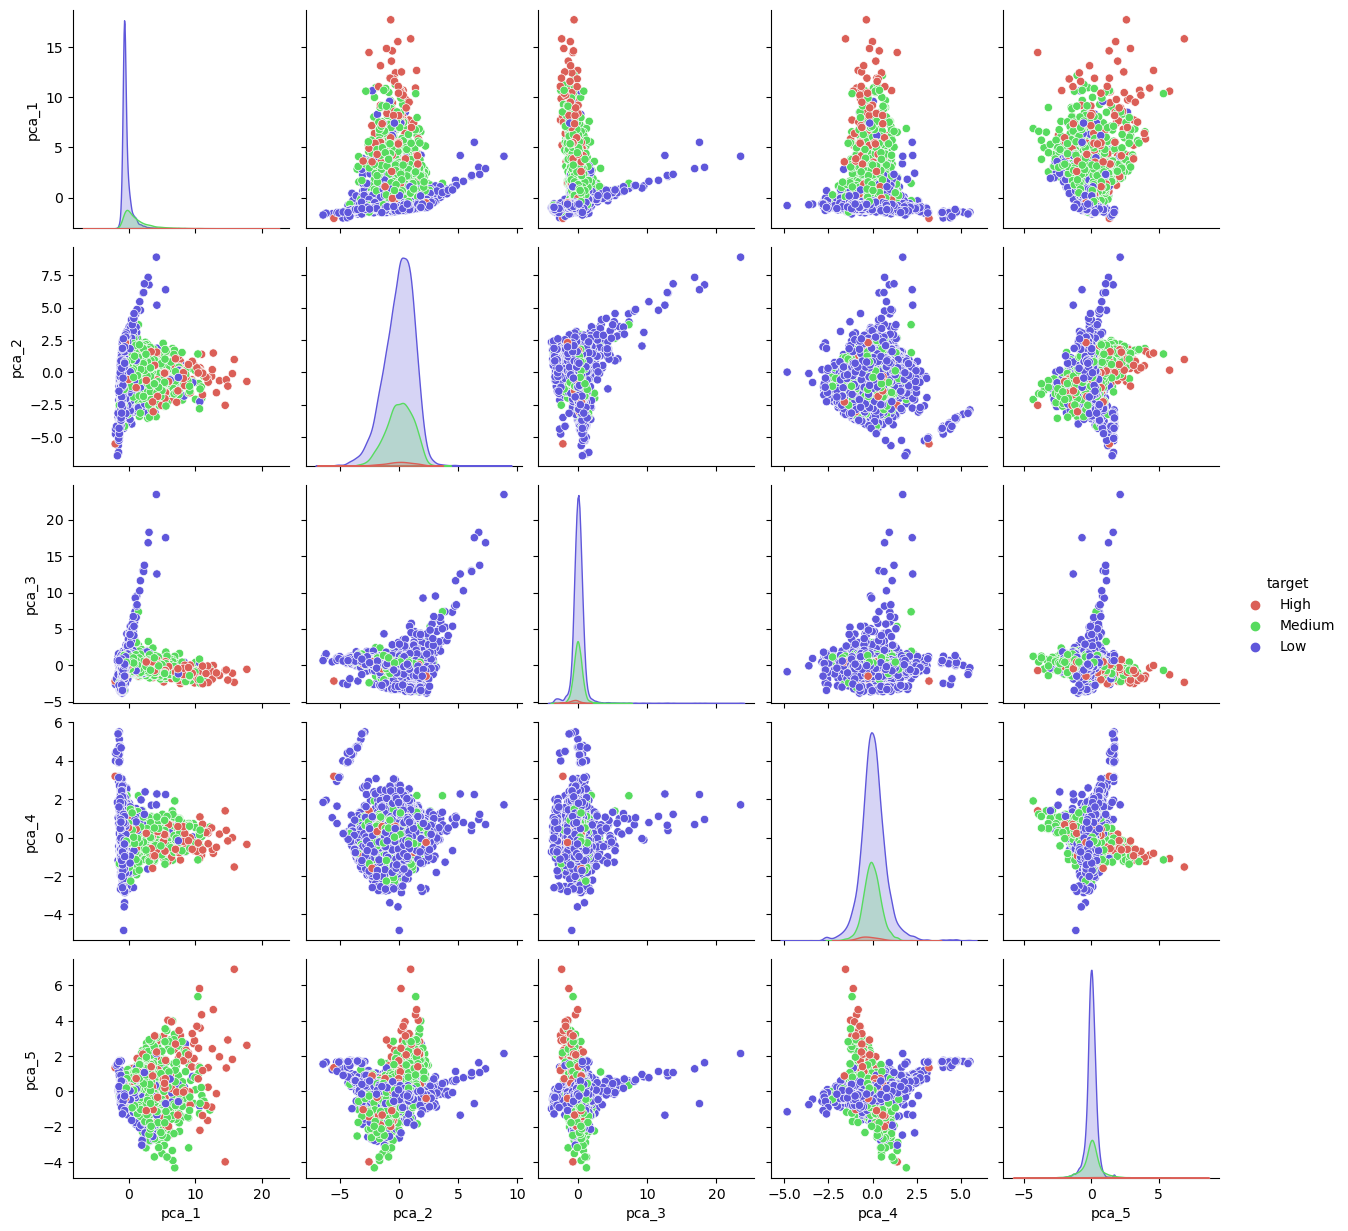

In [4]:
#plotting a pairwise plot to show the 5 components 
#applying PCA again with the optimal number of components
pca = PCA(n_components=5)
pca_results = pca.fit_transform(pca_df_std)

movie_df['pca_1'] = pca_results[:,0]
movie_df['pca_2'] = pca_results[:,1] 
movie_df['pca_3'] = pca_results[:,2]
movie_df['pca_4'] = pca_results[:,3]
movie_df['pca_5'] = pca_results[:,4]

selected_pcs = movie_df[['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5']]
selected_pcs['target'] = movie_df['popularity']

sns.pairplot(selected_pcs, hue = 'target', diag_kind='kde', palette=sns.color_palette("hls", 3))
plt.show()

After determining the optimal number of components, I carried out PCA with 5 componenets. The resulting components are linear combinations of the original features that capture the maximum variance in the data and are uncorrelated to each other. I stored the PCA components into the original movie dataframe and then plotted the results in a pairwise plot that displays each component plotted against each other.

## Dimensionality Reduction with t-SNE ##

After applying PCA to my dataset, I proceeded with the t-SNE process. T-distributed Stochastic Neighbor Embedding (t-SNE) is another method to carry out dimensionality reduction when dealing with high-dimensional data. The goal of t-SNE is to preserve the original pairwise similarities between data points as they are projected onto a lower-dimensional space. It can also capture clusters and relationships in the data. I will explore different perplexity values and their impact on my t-SNE results. Perplexity is a hyperparameter in t-SNE that allows us to view the local structure (through lower perplexity values) of the data as well as the global structure (higher perplexity values). The goal is to obtain a balance between local and global considerations.

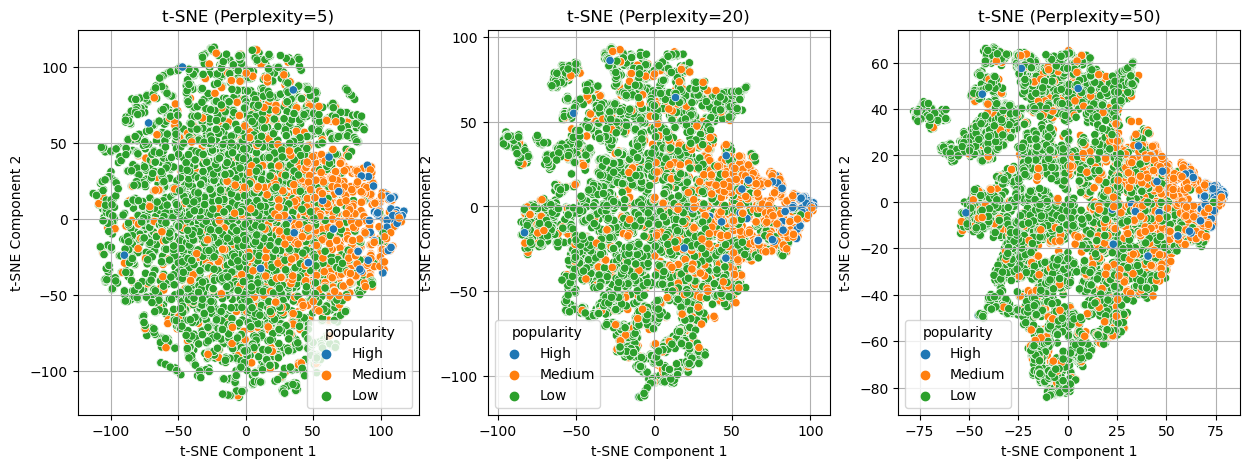

In [5]:
#defining multiple perplexity values
perplexities = [5, 20, 50]

fig, axes = plt.subplots(1, len(perplexities), figsize=(15, 5))

#applying t-SNE for each perplexity value
for i, perplexity_value in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_results = tsne.fit_transform(pca_df_std)

    movie_df['tsne_1'] = tsne_results[:, 0]
    movie_df['tsne_2'] = tsne_results[:, 1]

    sns.scatterplot(data=movie_df, x='tsne_1', y='tsne_2', hue='popularity', ax=axes[i])
    axes[i].set_title(f't-SNE (Perplexity={perplexity_value})')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')
    axes[i].grid(True)

plt.show()

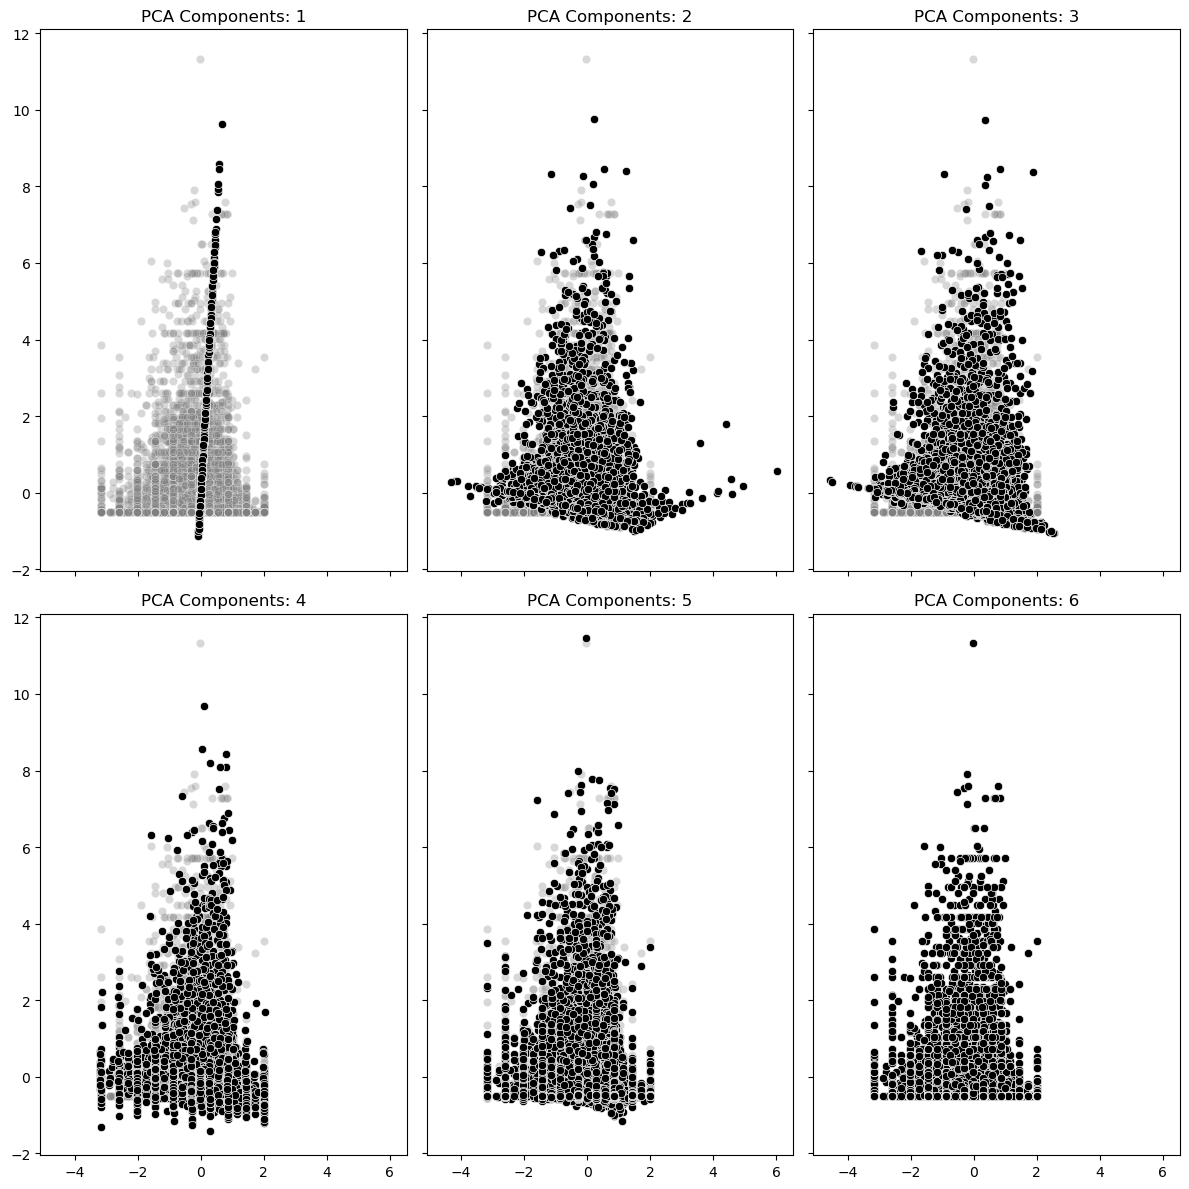

In [7]:
import seaborn as sns
def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(pca_df_std)
    X_new = pca.inverse_transform(pca.transform(pca_df_std))

    return X_new

rows = 2
cols = 3
comps = 1

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(pca_df_std, comps)
            ax = sns.scatterplot(x=pca_df_std[:, 0], 
                                 y=pca_df_std[:, 1], 
                                 ax=axes[row, col], 
                                 color='grey', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.savefig('pcavisualize_2.png', dpi=300)

## Evaluation and Comparison ##

I carried out two methods of dimensionality reduction on my movie dataset: PCA and t-SNE.

PCA is a good method for retaining the global structure of a dataset and capturing the overall variance. The principal components are uncorrelated, which provides an interpretable representation of the data. It’s most appropriate for handling linear relationships in datasets. As a result, it may not be able to address complex relationships well. PCA primarily focuses on the “big picture” of the data and we may not be able to observe the complexity of the dataset through this process.

On the contrary, t-SNE is better at retaining the local structure of the data, and will most likely produce more clustering across the datapoints. Unlike PCA, it is able to capture non-linear relationships, but it is not suitable for overly-large datasets. As experimented, t-SNE is sensitive to perplexity and will produce varied results depending on the assigned perplexity value. In my implementation of t-SNE on the movie dataset, I experienced a good amount of crowding amongst the data points, particularly when the perplexity values were lower.